### One Hot Encoding using Pandas library
One-hot encoding is a way to represent categorical data as binary vectors.
- We create a new binary column for each unique category in the categorical variable. 
- Each column represents one category, and the presence of that category is indicated by a 1 in the respective column and 0 in all other columns. 
- This can be achieved using the ``get_dummies()`` function in pandas.

#### Dealing with home data and predicting prices
We have a categorical column i.e. town, we cannot directly provide some random value to each town as it will not train the model good. The model would start making certain relation in the columns which can result in wrong training so we are using the concept of One Hot Encoding.

In [20]:
import pandas as pd

data = pd.read_csv('homedata.csv')

# Generating dummy data for categorical column
categorical_dummy_DF = pd.get_dummies(data.town, dtype=int)

# Creating Final DataFrame
final_data = pd.concat([data, categorical_dummy_DF], axis='columns')
final_data

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [21]:
# Removing un-useful column i.e. town and also one extra column (any town-column) as it will lead to Dummy Variable Trap
final_data.drop(['town', 'west windsor'], axis='columns', inplace=True)

final_data

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


#### Dummy Variable Trap
A situation where one or more dummy variables can be predicted from the other dummy variables. This creates multicollinearity, a condition where two or more predictor variables are highly correlated, making it difficult for the model to estimate the true effect of each variable.

In [22]:
# Separating X and Y for training
X = final_data[['area', 'monroe township', 'robinsville']]
Y = final_data['price']

In [23]:
from sklearn.linear_model import LinearRegression

# Creating model
model = LinearRegression()

# Training the model
model.fit(X, Y)

LinearRegression()

In [24]:
# Predicting Outcome
'''
We need to provide the value of three towns, but since we have only two town
We can provide it in the form of vector i.e. 
[1, 0, 0] for town-1
[0, 1, 0] for town-2
[0, 0, 0] for town-3
'''

print(model.predict([[3400,0,0]]))
print(model.predict([[2800,0,1]]))

[681241.66845839]
[590775.63964739]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
# Checking the accuracy of the model
model.score(X, Y)

0.9573929037221873

### Plotting the graph

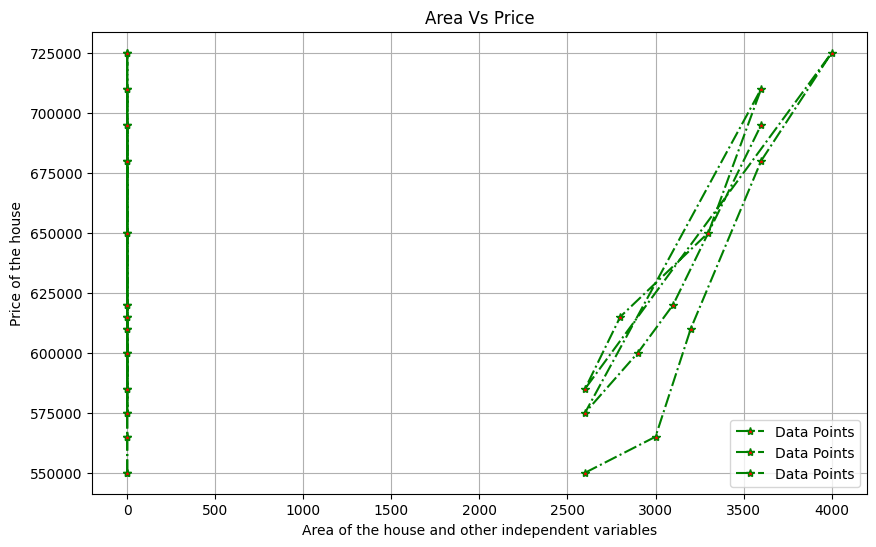

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6)) 

# Plotting the data
plt.plot(X, Y, marker='*', color='green', linestyle='-.', markerfacecolor='red', label='Data Points')

# Adding labels and title
plt.xlabel('Area of the house and other independent variables')
plt.ylabel('Price of the house')
plt.title('Area Vs Price')

# Adding grid lines and legen
plt.grid(True)
plt.legend()
plt.show()

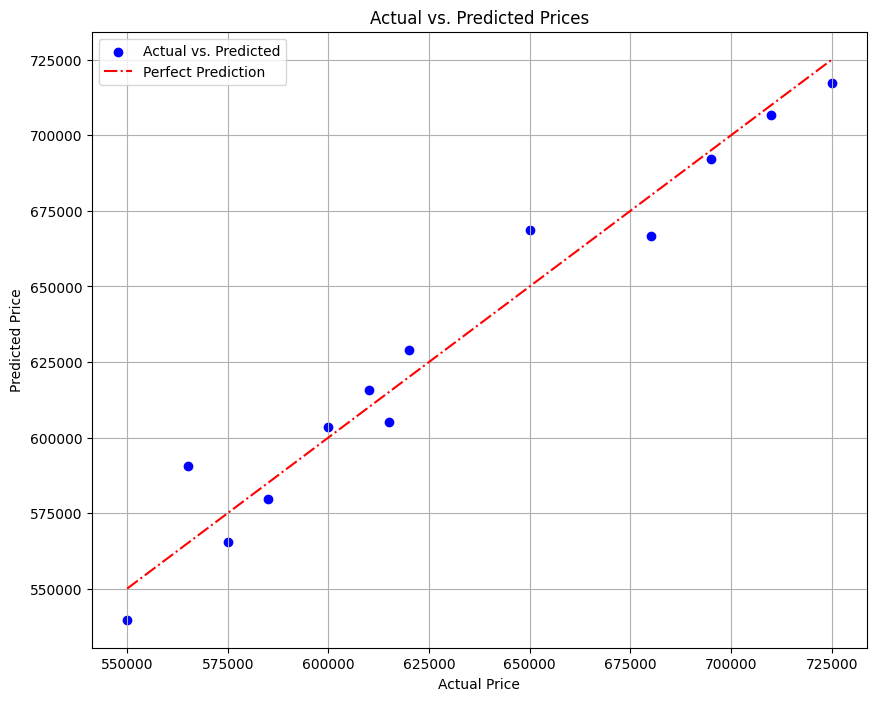

In [51]:
plt.figure(figsize=(10, 8))
predictions = model.predict(X)
plt.scatter(Y, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='-.', label='Perfect Prediction')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

#### Note:
In the above code, `[min(Y), max(Y)], [min(Y), max(Y)]` creates a diagonal line from the bottom-left corner to the top-right corner of the plot. This diagonal line represents a scenario where the predicted values perfectly match the actual values.